In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
# calling data
%store -r X_train
X_train = X_train

%store -r y_train
y_train = y_train

%store -r X_val
X_val = X_val

%store -r y_val
y_val = y_val

%store -r X_test
X_test = X_test

%store -r y_test
y_test = y_test

based on each model, we define specific pipeline and build and train model

In [3]:
def evaluate_model(X_train, y_train, X_val, y_val, model):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    cross_val_r2 = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')
    cross_val_rmse = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

    print(f"Training CV R2: {cross_val_r2.mean():.4f}, Training CV RMSE: {cross_val_rmse.mean():.4f}")

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    r2_train = r2_score(y_train, y_train_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_val = r2_score(y_val, y_val_pred)
    rmse_val = np.sqrt(mean_squared_error(y_val,y_val_pred))

    print(f"Training R2: {r2_train:.4f}, Training RMSE: {rmse_train:.4f}")
    print(f"Validation R2: {r2_val:.4f}, Validation RMSE: {rmse_val:.4f}")

## Model Training

### Linear Regression

In [4]:
model = Pipeline([
    ('scaler', StandardScaler()), # since linear regression algorithm needs scaling
    ('lin_reg', LinearRegression())
])

evaluate_model(X_train, y_train, X_val, y_val, model)

Training CV R2: 0.9991, Training CV RMSE: -95.2011
Training R2: 0.9991, Training RMSE: 95.8568
Validation R2: 0.9996, Validation RMSE: 63.3000


- The model is not underfit (both CV and Validation is high) and overfit (CV and Validation are close to each other)

### Decision Tree Regressor

In [5]:
model = Pipeline([
    ('decisiontree_reg', DecisionTreeRegressor())
])

evaluate_model(X_train, y_train, X_val, y_val, model)

Training CV R2: 0.8910, Training CV RMSE: -1028.0032
Training R2: 1.0000, Training RMSE: 0.0000
Validation R2: 0.8979, Validation RMSE: 992.7717


- This model is overfit (CV train and train have gap). But, since the gap between CV and Validation is small, that overfitting is not severe.
- Model not suitable for further progress

### Random Tree Regressor

In [6]:
model = Pipeline([
    ('randomforest_reg', RandomForestRegressor())
])

In [7]:
evaluate_model(X_train, y_train, X_val, y_val, model)

Training CV R2: 0.9596, Training CV RMSE: -629.1609
Training R2: 0.9950, Training RMSE: 222.7695
Validation R2: 0.9631, Validation RMSE: 597.2946


- This model is not underfit (Both CV and Validation are high) and overfit (CV and Validation are close to each other)
- RMSE is worse than linear regression. so not suitable for further progress

### Support Vector Regression

In [8]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR(kernel='rbf'))
])

evaluate_model(X_train, y_train, X_val, y_val, model)

Training CV R2: 0.0685, Training CV RMSE: -3027.3353
Training R2: 0.0862, Training RMSE: 2999.4412
Validation R2: 0.0855, Validation RMSE: 2971.9019


- R2 and RMSE shows how poor this model performs
- Not suitable for further progress

### XGBoost Regressor

In [9]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBRegressor(objective='reg:squarederror'))
])

evaluate_model(X_train, y_train, X_val, y_val, model)

Training CV R2: 0.9920, Training CV RMSE: -280.2217
Training R2: 0.9986, Training RMSE: 116.9903
Validation R2: 0.9928, Validation RMSE: 264.4133


- The model is not underfit (both CV and Validation is high) and overfit (CV and Validation are close to each other)
- Almost near to linear regression. Still linear regression algorithm is better

### Catboost Regressor

In [10]:
model = Pipeline([
    ('catboost', CatBoostRegressor())
])

evaluate_model(X_train, y_train, X_val, y_val, model)

Learning rate set to 0.052996
0:	learn: 3002.5386655	total: 141ms	remaining: 2m 20s
1:	learn: 2890.4135878	total: 145ms	remaining: 1m 12s
2:	learn: 2778.1454173	total: 149ms	remaining: 49.5s
3:	learn: 2665.7300331	total: 154ms	remaining: 38.4s
4:	learn: 2566.5007295	total: 160ms	remaining: 31.8s
5:	learn: 2466.6806402	total: 164ms	remaining: 27.1s
6:	learn: 2373.4589497	total: 168ms	remaining: 23.8s
7:	learn: 2293.4925541	total: 171ms	remaining: 21.3s
8:	learn: 2211.9292694	total: 175ms	remaining: 19.3s
9:	learn: 2142.2271927	total: 178ms	remaining: 17.7s
10:	learn: 2068.6222117	total: 182ms	remaining: 16.4s
11:	learn: 1996.8986098	total: 186ms	remaining: 15.3s
12:	learn: 1928.0045382	total: 189ms	remaining: 14.4s
13:	learn: 1861.5175984	total: 193ms	remaining: 13.6s
14:	learn: 1802.5331527	total: 197ms	remaining: 12.9s
15:	learn: 1737.3324456	total: 201ms	remaining: 12.4s
16:	learn: 1681.5858913	total: 205ms	remaining: 11.9s
17:	learn: 1631.0369481	total: 208ms	remaining: 11.4s
18:	le

- There is no overfit since training and validaion metrics are pretty close to each other
- No underfit as both metrics are high
- RMSE score is much better than linear regression algorithm

### AdaBoost Regressor

In [11]:
model = Pipeline([
    ('adaboost', AdaBoostRegressor())
])

evaluate_model(X_train, y_train, X_val, y_val, model)

Training CV R2: 0.8875, Training CV RMSE: -1062.3449
Training R2: 0.8910, Training RMSE: 1035.8621
Validation R2: 0.8841, Validation RMSE: 1057.7727


- CV and Validation metrics are comparetively less. RMSE score is worse

## Model Selection

Based on the result of default model training, the best model is `CatBoost` with R2 0.9997 and RMSE ~50

In [4]:
best_model = CatBoostRegressor()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cross_val_r2 = cross_val_score(best_model, X_train, y_train, cv=kf, scoring='r2')
cross_val_rmse = cross_val_score(best_model, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

print(f"Training CV R2: {cross_val_r2.mean():.4f}, Training CV RMSE: {-cross_val_rmse.mean():.4f}")

best_model.fit(X_train, y_train, logging_level='Silent')

y_train_pred = best_model.predict(X_train)
y_val_pred = best_model.predict(X_val)

r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_val = r2_score(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val,y_val_pred))

print(f"Training R2: {r2_train:.4f}, Training RMSE: {rmse_train:.4f}")
print(f"Validation R2: {r2_val:.4f}, Validation RMSE: {rmse_val:.4f}")

Learning rate set to 0.052996
0:	learn: 3002.5386655	total: 208ms	remaining: 3m 27s
1:	learn: 2890.4135878	total: 213ms	remaining: 1m 46s
2:	learn: 2778.1454173	total: 217ms	remaining: 1m 12s
3:	learn: 2665.7300331	total: 222ms	remaining: 55.3s
4:	learn: 2566.5007295	total: 226ms	remaining: 45s
5:	learn: 2466.6806402	total: 232ms	remaining: 38.5s
6:	learn: 2373.4589497	total: 237ms	remaining: 33.6s
7:	learn: 2293.4925541	total: 241ms	remaining: 29.9s
8:	learn: 2211.9292694	total: 245ms	remaining: 27s
9:	learn: 2142.2271927	total: 250ms	remaining: 24.8s
10:	learn: 2068.6222117	total: 255ms	remaining: 22.9s
11:	learn: 1996.8986098	total: 259ms	remaining: 21.3s
12:	learn: 1928.0045382	total: 264ms	remaining: 20s
13:	learn: 1861.5175984	total: 268ms	remaining: 18.9s
14:	learn: 1802.5331527	total: 272ms	remaining: 17.9s
15:	learn: 1737.3324456	total: 276ms	remaining: 17s
16:	learn: 1681.5858913	total: 281ms	remaining: 16.2s
17:	learn: 1631.0369481	total: 285ms	remaining: 15.6s
18:	learn: 15

## Tune model with Hyper-parameter

In [13]:
params = {
    'iterations':[100,200], # Number of boosting iterations
    'learning_rate':[0.01,0.05,0.1], # Step size at each iteration
    'depth':[4,6,8], # Depth of the trees
    'l2_leaf_reg':[1,3,5], # L2 regularization coefficient
    'border_count':[32, 64] # Number of splits in categorical features
}

grid_search = GridSearchCV(
    estimator=best_model,
    param_grid=params,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)
print('Best parameters found : ',grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
0:	learn: 2888.0417665	total: 5.67ms	remaining: 1.13s
1:	learn: 2665.7584991	total: 12.3ms	remaining: 1.22s
2:	learn: 2459.0639081	total: 18ms	remaining: 1.18s
3:	learn: 2269.6344175	total: 23.8ms	remaining: 1.17s
4:	learn: 2098.5474188	total: 29.9ms	remaining: 1.16s
5:	learn: 1935.9177030	total: 37.6ms	remaining: 1.21s
6:	learn: 1790.7684006	total: 43.4ms	remaining: 1.2s
7:	learn: 1658.4272986	total: 48.9ms	remaining: 1.17s
8:	learn: 1531.0900143	total: 54.4ms	remaining: 1.15s
9:	learn: 1424.5911535	total: 59.8ms	remaining: 1.14s
10:	learn: 1315.4917518	total: 65.3ms	remaining: 1.12s
11:	learn: 1220.7107011	total: 71.2ms	remaining: 1.11s
12:	learn: 1136.1108968	total: 76.9ms	remaining: 1.11s
13:	learn: 1055.4784608	total: 81.9ms	remaining: 1.09s
14:	learn: 992.7520191	total: 87.6ms	remaining: 1.08s
15:	learn: 928.6710036	total: 93.4ms	remaining: 1.07s
16:	learn: 870.3682531	total: 99ms	remaining: 1.06s
17:	learn: 814.12260

In [14]:
best_model_tuned = grid_search.best_estimator_
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cross_val_r2 = cross_val_score(best_model_tuned, X_train, y_train, cv=kf, scoring='r2')
cross_val_rmse = cross_val_score(best_model_tuned, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

print(f"Training CV R2: {cross_val_r2.mean():.4f}, Training CV RMSE: {cross_val_rmse.mean():.4f}")

best_model_tuned.fit(X_train, y_train)

y_train_pred = best_model_tuned.predict(X_train)
y_val_pred = best_model_tuned.predict(X_val)

r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_val = r2_score(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val,y_val_pred))

print(f"Training R2: {r2_train:.4f}, Training RMSE: {rmse_train:.4f}")
print(f"Validation R2: {r2_val:.4f}, Validation RMSE: {rmse_val:.4f}")

0:	learn: 2884.1990336	total: 4.46ms	remaining: 887ms
1:	learn: 2658.5119863	total: 10.3ms	remaining: 1.02s
2:	learn: 2446.4602926	total: 16.1ms	remaining: 1.06s
3:	learn: 2259.7482969	total: 20.8ms	remaining: 1.02s
4:	learn: 2110.9383757	total: 27.3ms	remaining: 1.06s
5:	learn: 1950.3827177	total: 34.6ms	remaining: 1.12s
6:	learn: 1805.7915147	total: 38.7ms	remaining: 1.07s
7:	learn: 1674.3171634	total: 43.3ms	remaining: 1.04s
8:	learn: 1549.6043297	total: 48.8ms	remaining: 1.04s
9:	learn: 1445.9986471	total: 52.8ms	remaining: 1s
10:	learn: 1345.2364976	total: 56.8ms	remaining: 976ms
11:	learn: 1247.8360836	total: 61.3ms	remaining: 960ms
12:	learn: 1163.8494765	total: 65.3ms	remaining: 939ms
13:	learn: 1078.3974979	total: 69.3ms	remaining: 921ms
14:	learn: 1006.4104670	total: 73.7ms	remaining: 909ms
15:	learn: 942.1809371	total: 78ms	remaining: 897ms
16:	learn: 873.9165404	total: 82.1ms	remaining: 884ms
17:	learn: 823.7700755	total: 86.1ms	remaining: 871ms
18:	learn: 775.1569669	total

#### We can clearly see the model which is not tuned performs better than the model which is tuned.
#### Thus, we consider the default model as the final model.

## Final Evaluation of Model

In [5]:
final_model = best_model

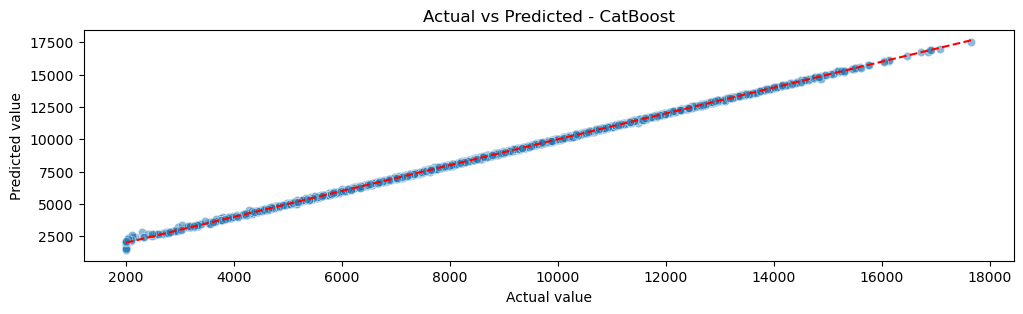

In [6]:
## Scatter Plot - Actual vs Predicted
plt.figure(figsize=(12, 3))

sns.scatterplot(
    x = y_val,
    y = y_val_pred,
    alpha = 0.5
)

plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], '--', color='red')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('Actual vs Predicted - CatBoost')

plt.show()

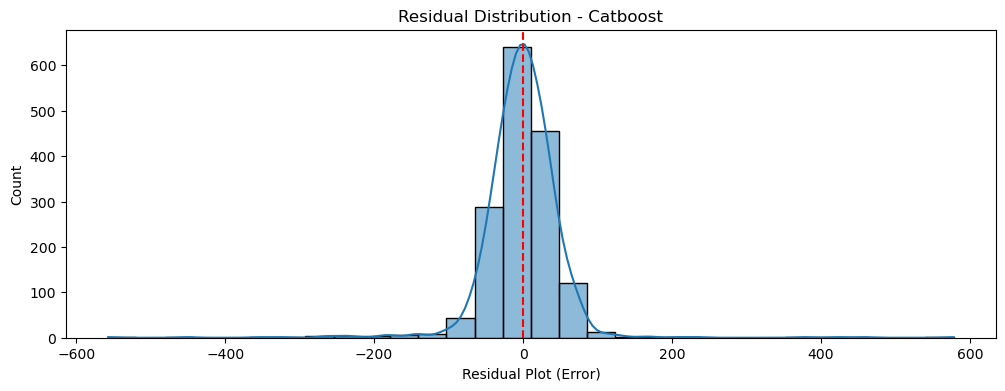

In [7]:
## Residual Plot (Error)
residuals = y_val - y_val_pred

plt.figure(figsize=(12,4))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color='red', linestyle='dashed')
plt.xlabel('Residual Plot (Error)')
plt.title('Residual Distribution - Catboost')
plt.show()

## Apply Model on Test data

In [8]:
def preprocess_test(X_test, train_columns, brand_encoder_path, model_encoder_path, onehot_encoder_path):
    """
    Preprocess the test data using the saved encoders and align with training columns.
    
    Parameters:
    - X_test: Raw test DataFrame
    - train_columns: Columns of the final processed training data (e.g., df.columns)
    - brand_encoder_path: Path to saved brand mean encoder .pkl
    - model_encoder_path: Path to saved model mean encoder .pkl
    - onehot_encoder_path: Path to saved OneHotEncoder .pkl
    
    Returns:
    - X_test_encoded: Final processed and aligned test DataFrame
    """

    # Load saved encoders
    with open(brand_encoder_path, 'rb') as f:
        brand_encoder = pickle.load(f)
    with open(model_encoder_path, 'rb') as f:
        model_encoder = pickle.load(f)
    with open(onehot_encoder_path, 'rb') as f:
        onehot_encoder = pickle.load(f)

    cat_columns = ['Transmission', 'Fuel_Type']

    # Copy test data
    X_test_copy = X_test.copy()

    # Apply mean encoding for Brand and Model
    X_test_copy['Brand_encoded'] = X_test_copy['Brand'].map(brand_encoder)
    X_test_copy['Brand_encoded'].fillna(brand_encoder.mean(), inplace=True)

    X_test_copy['Model_encoded'] = X_test_copy['Model'].map(model_encoder)
    X_test_copy['Model_encoded'].fillna(model_encoder.mean(), inplace=True)

    # Drop original columns
    X_test_copy.drop(['Brand', 'Model'], axis=1, inplace=True)

    # One-hot encoding for Fuel and Transmission
    encoded_array = onehot_encoder.transform(X_test_copy[cat_columns])
    encoded_df = pd.DataFrame(encoded_array, 
                              columns=onehot_encoder.get_feature_names_out(cat_columns), 
                              index=X_test_copy.index)

    # Drop original categorical columns and merge
    X_test_encoded = X_test_copy.drop(columns=cat_columns)
    X_test_encoded = pd.concat([X_test_encoded, encoded_df], axis=1)

    # Add missing columns
    missing_cols = set(train_columns) - set(X_test_encoded.columns)
    for col in missing_cols:
        X_test_encoded[col] = 0

    # Drop any extra columns and reorder to match training
    X_test_encoded = X_test_encoded[train_columns]

    return X_test_encoded


In [10]:
%store -r train_columns

X_test_final = preprocess_test(
    X_test = X_test,
    train_columns = train_columns, # your final processed training DataFrame
    brand_encoder_path = '../../models/Brand_Encoder.pkl',
    model_encoder_path = '../../models/Model_Encoder.pkl',
    onehot_encoder_path = '../../models/OneHot_Encoder.pkl'
)

y_pred = best_model.predict(X_test_final)
y_pred

array([ 1826.44105268, 11208.92617592, 14552.48066818, ...,
        8117.6943612 ,  6670.46494654, 11837.13992065])

In [11]:
r2_test = r2_score(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Test R2: {r2_test:.4f}, Test RMSE: {rmse_test:.4f}")

Test R2: 0.9997, Test RMSE: 49.2442


#### The result shows model is well generalized and there is no overfitting/underfitting.

In [13]:
##Checkpoint

pickle.dump(best_model, open('../../models/Model.pkl', 'wb'))